In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Norm - size of a vector

<img src="https://cdn.mathpix.com/snip/images/aj97mdGD6kK0EQ39kmT_p0LRinlBmmvwo7aTiW2sHUs.original.fullsize.png"><br>

Source: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html

Let's try the same example as given in the link along with a small exercise:

In [2]:
a = np.arange(9) - 4

In [3]:
a

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [4]:
b = a.reshape((3,3))

In [5]:
b

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4]])

In [6]:
np.linalg.norm(a)

7.745966692414834

In [7]:
np.linalg.norm(b)

7.745966692414834

In [8]:
a.shape

(9,)

In [9]:
b.shape

(3, 3)

# So, the L1 norm just seems to be the summation of all the absolute values of the elements in a vector

So, for any vector of any shape, we would just flatten the vector, and add the absolute values of the all the elements to get the L1 norm:    

Source: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.flatten.html<br>
https://stackoverflow.com/questions/18777737/how-to-calculate-the-absolute-value-for-an-array-in-python<br>
https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html<br>

In [10]:
def l1_norm_calculator(vector):
    x = vector.flatten()
    x = np.absolute(x)
    x = np.sum(x)
    return x

In [11]:
l1_norm_calculator(a)

20

In [12]:
np.linalg.norm(a, 1)

20.0

In [13]:
l1_norm_calculator(b)

20

In [14]:
np.linalg.norm(b, 1)

7.0

How is the above value 7? why is it not 20? Are vector norms and matrix norms calculated differently?

Seems like we guessed right. Check out the special cases here: https://en.wikipedia.org/wiki/Matrix_norm

So the matrix norm is basically the sum of all the elements of a column which is why it comes out to 7.

# Let's extend this to the L2 Norm:

In [15]:
np.linalg.norm(a,2)

7.745966692414834

In [16]:
np.linalg.norm(b,2)

7.3484692283495345

In [17]:
def l2_norm_calculator_vec(vector):
    x = vector.flatten()
    x = np.absolute(x)* np.absolute(x) #Elementwise product
    x = np.sum(x)
    return np.sqrt(x)

Source: https://www.sharpsightlabs.com/blog/numpy-square-root/<br>
https://stackoverflow.com/questions/13567345/how-to-calculate-the-sum-of-all-columns-of-a-2d-numpy-array-efficiently<br>

In [18]:
l2_norm_calculator_vec(a)

7.745966692414834

In [19]:
def l2_norm_calculator_matrix(matrix):
    x = np.absolute(matrix) * np.absolute(matrix) #elementwise product
    x = x.sum(axis=0)
    x = np.sqrt(x)
    return max(x)

In [20]:
l2_norm_calculator_matrix(b)

4.58257569495584

If np.sqrt(21) was the answer then the above is the right answer. It seems like we were fooled again by the definition.

Source: https://math.stackexchange.com/questions/3044929/l2-norm-of-a-matrix-is-this-statement-true<br>
Seems like a complicated story, remains to be seen if we will actually need it.

# The grand takeaway here is calculation of L<sup>p</sup> norms for vectors is trivially simple based on the formula and the two functions we just went over, the matrix norm however, is defined differently and will need to be handled as such.

### In general, a norm is function which satisfies the following properties:

<img src="https://cdn.mathpix.com/snip/images/lRDkl4gvC9MMUmfq8usGICW4CwS_IQ6OEx_CRYhNlr4.original.fullsize.png"><br>

1. The norm is zero when the input to the norm is zero, trivial really, when you think about completely zero vectors.
2. The norm of the addition of two vectors will be less than or equal to the sum of the individual norms of these vectors.
3. The norm of any real constant multiplied by the input vector will be the same as the product of the absolute value of this constant and the norm of the input vector.

# L2 and L1 norms are very frequently used in ML.

### L2 norm is often mentioned without the subsccript 2. 
### L2 norm is used to measure the size of a vector by using- x<sup>T</sup>x

The squared L2 norm is also quite frequently used. <br>This is because the squared L2 norm is simply the sum of the squares of the individual elements (no needs for absolute either, since the square of a negative number will be the same as the square of a positive number. <br>Therefore:<br>
squared_L2_norm_of_vector(x) = x<sub>1</sub><sup>2</sup> + x<sub>2</sub><sup>2</sup> + x<sub>3</sub><sup>2</sup> + ..... + x<sub>n</sub><sup>2</sup><br>
squared_L2_norm_of_vector = F<br>
Derivative of F(x) wrt x<sub>1</sub> = 2X<sub>1</sub><br>
Derivative of F(x) wrt x<sub>2</sub> = 2X<sub>2</sub><br>
......<br>
Dervative of F(x) wrt x<sub>n</sub> = 2X<sub>n</sub><br>

The partial derivatives depend only on the corresponding element of x, whereas for the non-squared L2 norm they depend on the entire vector.

L2_norm_of_vector(x) = np.sqrt(x<sub>1</sub><sup>2</sup> + x<sub>2</sub><sup>2</sup> + x<sub>3</sub><sup>2</sup> + ..... + x<sub>n</sub><sup>2</sup>)<br>
L2_norm_of_vector = G<br>
Derivative of G(x) wrt x<sub>1</sub> = 0.5 . G(x) ^ (-1/2) . 2 . x<sub>1</sub><br>
Derivative of G(x) wrt x<sub>1</sub> = 0.5 . 2 . x<sub>1</sub> . (np.sqrt(x<sub>1</sub><sup>2</sup> + x<sub>2</sub><sup>2</sup> + x<sub>3</sub><sup>2</sup> + ..... + x<sub>n</sub><sup>2</sup>)) ^ (-1/2)

### The squared L2 norm grows very slowly near the origin since the square of a number less than 1 will be less than the original number itself. In these cases it is better to use the L1 norm.

In [21]:
a = 0.1
math.pow(a,2)

0.010000000000000002

L1 norm is often used as a substitute to count the number of non zero entries in a vector.

# Max Norm - simply the largest element in the vector:

<img src="https://cdn.mathpix.com/snip/images/gDZeq2S8-Zvh1c6go5C_JDUeR-Mx7IFSWmMSPa3PX60.original.fullsize.png"><br>

### The Frobenius norm is analogous to the L2 norm and is used to measure the size of a vector.

<img src="https://cdn.mathpix.com/snip/images/2HvnO-qWnslr46ZC-k28_0jMVtThgaTSGRa8mRCRDc4.original.fullsize.png"><br>

In [60]:
b

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4]])

In [61]:
np.linalg.norm(b, 'fro')

7.745966692414834

In [64]:
a = np.arange(9) - 4
a

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [67]:
np.linalg.norm(a, 'fro')

ValueError: Invalid norm order for vectors.

### looks like 'fro' doesnt work for 1D vectors. Why arent we using the .shape argument for all of these? Is it somehow less efficient? I guess it would just traverse an array and increase the count right?

### Also:

<img src="https://cdn.mathpix.com/snip/images/CXaVFkAMnDbaJQ-dzW7Up1rrugQEmfZKx0HM66IkaQo.original.fullsize.png"><br>

# Special kinds of Matrices and Vectors:

### Diagonal Matrix: All the non-diagonal elements are zero, for example in the identity matrix. A matrix where only the diagonal elements are non-zero.

In [11]:
a = np.eye(4,4)
a

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [13]:
# This is to find the diagonal of a matrix.
np.diagonal(a)

array([1., 1., 1., 1.])

Source: https://docs.scipy.org/doc/numpy/reference/generated/numpy.diagonal.html

1. Diagonal matrices are computationaly efficient.<br>
diag(v)x = Hadamard_product(v,x)<br>
2. The inverse only exists if the diagonal elements are non-zero.

### Symmetric Matrix: A matrix that is equal to its own transpose.

### Unit Vector : A vector with unit norm.

### x and y are orthogonal if x<sup>T</sup>y = 0.

This means that for non-zero norm, x and y are at 90 degrees to each other.<br>
If the vectors are not only orthogonal, but also have unit norm, then we call them <b>Orthonormal</b>

#### From the book:

<img src="https://cdn.mathpix.com/snip/images/WtDM_cHOcsQN_hTraMXVDrZMQqaEaemOvj39RGtnA68.original.fullsize.png"><br>

Initializing mathjax
<script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>

Example (trial):
When $$(a \ne 0),$$ there are two solutions to \(ax^2 + bx + c = 0\) and they are
$$x = {-b \pm \sqrt{b^2-4ac} \over 2a}.$$
(end of trial)

# Eigendecomposition:

Similar to prime factorization of integers, matrices can be decomposed to show some of their functional properties that are not obvious from their representation as an array of elements. One of these ways of representation is called <b>Eigendecomposition</b>, in which we decompose a matrix into <b>eigenvalues</b> and <b>eigenvectors</b> .

Source: https://docs.mathjax.org/en/latest/basic/mathematics.html<br>
https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols<br>
https://tex.stackexchange.com/questions/327844/real-number-symbol-r-not-working<br>
https://tex.stackexchange.com/questions/52276/inline-equation-in-latex-with-text<br>

$$\boldsymbol{A} \boldsymbol{v}=\lambda \boldsymbol{v}$$
where, <br>
$$\boldsymbol{A} = \text{Square matrix A, mutiplication by A only alters the scale of v}$$<br>
$$\boldsymbol{v} = \text{Eigenvector of Square matrix A}$$<br>
$$\lambda = \text{Eigenvalue of the eigenvector}$$

From the book:<img src="https://cdn.mathpix.com/snip/images/dJePmPkLeEQkTLqtcg16K6Cz9Yu7--99LvcQXU2FUn4.original.fullsize.png"><br>

i.e from above, for $$s \in \mathbb{R}, s \neq 0,$$
$$\boldsymbol{A} \boldsymbol{s}=\lambda \boldsymbol{s}$$
<hr>

$$\boldsymbol{A} \text{ has n linearly dependent eigenvectors:}\left\{\boldsymbol{v}^{(1)}, \ldots,\right., \boldsymbol{v}^{(n)}\} \text{ with eigenvalues: } \left\{\lambda_{1}, \ldots, \lambda_{n}\right\}, \text{ then we can concatenate (just place them side by side, nothing special) all the eigenvectors to form a matrix } \boldsymbol{V} \text{ and we can do the same for } \lambda, i.e: $$

$$
\boldsymbol{V}=\left[\boldsymbol{v}^{(1)}, \ldots\right.,\boldsymbol{v}^{(n)}]
$$

$$
\boldsymbol{\lambda}=\left[\lambda_{1}, \ldots,\right., \lambda_{n}]^{\top}
$$

The <b>eigendecomposition</b> of $\boldsymbol{A}$ is given by:

$$
\boldsymbol{A}=\boldsymbol{V} \operatorname{diag}(\boldsymbol{\lambda}) \boldsymbol{V}^{-1}
$$

### Didn't really undestand how we ended up with the above.

Source: https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix <hr>

<img src="https://cdn.mathpix.com/snip/images/8vTLc7NdfONC5iK_bFgQ0AZ_DCsN1tsc9hHloYHj1Ys.original.fullsize.png"><br>
<img src="https://cdn.mathpix.com/snip/images/CaG7TiktZTejvokkdVoHb-rKfL6hTpXrIJR5Q0icEII.original.fullsize.png"><br>
<hr>

### Doubt:

$$\boldsymbol{A} \boldsymbol{v}=\lambda \boldsymbol{v}$$
We replace $\boldsymbol{v}$  by $\boldsymbol{Q}$, and $\lambda$ by its diagonal version????? Ordering seems off
$$\boldsymbol{A} \boldsymbol{Q}=\boldsymbol{Q} \Lambda$$
<br>
I'm still not clear on how we went from $\boldsymbol{A} \boldsymbol{v}=\lambda \boldsymbol{v}$ to $\boldsymbol{A} \boldsymbol{Q}=\boldsymbol{Q} \Lambda$

The second step is clear enough, multiply by the inverse matrix on both the sides (Q inverse), and since the inverse of a symmetric matrix is the same as its transpose, we get the result below:

For real symmetric matrices:

$$
\boldsymbol{A}=\boldsymbol{Q} \boldsymbol{\Lambda} \boldsymbol{Q}^{\top}
$$

### Some easy pickings:

* A matrix whose eigenvalues are all positive is called <b>positive definite</b>
* A matrix whose eigenvalues are all positive or zero is called <b>positive semidefinite</b>
* A matrix whose eigenvalues are all negative is called <b>negative definite</b>
* A matrix whose eigenvalues are all negative or zero is called <b>negative semidefinite</b>

For positive semidefinite matrices: <br>
For all input x, x<sup>T</sup>Ax will be greater than or equal to 0.

Positive Definite matrices:<br>
For all input x, x<sup>T</sup>Ax will be greater than 0.

# Singular Value Decomposition:

* Alternate way to factorize a matrix rather than doing it with eigenvalues and eigenvectors.
* Generally more applicable. Every matrix has an SVD, every matrix does not have an eigenvalue and eigenvector.(non-square matrices)

A = V . diag(&lambda;) . V<sup>-1</sup>

We need an intuitive way to think about Eigenvalues and eigenvectors, this equation aint gonna cut it.<br>
1. https://math.stackexchange.com/questions/243533/how-to-intuitively-understand-eigenvalue-and-eigenvector
2. http://setosa.io/ev/eigenvectors-and-eigenvalues/

SVD says: A = U . D . V<sup>T</sup>

* U (left singular vector) and V (right singular vector) need to be orthogonal matrices (U<sup>T</sup> = U<sup>-1</sup>, same for V)
* D (singular values) need not be square

# Some practice with eigenvalues and SVD:

## Eigenvalues:

http://www.physics.utah.edu/~detar/lessons/python/numpy_eigen/node1.html

lhs - left hand side, 
rhs - right hand side

We are trying to get this result:
$$\boldsymbol{A} \boldsymbol{v}=\lambda \boldsymbol{v}$$

Let's define a few matrices:

In [23]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[9,9,9],[9,9,9],[9,9,9]])

In [55]:
values, vectors = np.linalg.eig(A)

In [25]:
values

array([ 1.61168440e+01, -1.11684397e+00, -9.75918483e-16])

In [47]:
values.shape

(3,)

In [26]:
vectors

array([[-0.23197069, -0.78583024,  0.40824829],
       [-0.52532209, -0.08675134, -0.81649658],
       [-0.8186735 ,  0.61232756,  0.40824829]])

In [48]:
vectors.shape

(3, 3)

In [33]:
lhs = np.dot(A,vectors)
rhs = np.dot(values,vectors)

In [34]:
lhs

array([[-3.73863537e+00,  8.77649763e-01, -3.88578059e-16],
       [-8.46653421e+00,  9.68877101e-02, -3.33066907e-16],
       [-1.31944331e+01, -6.83874343e-01, -7.21644966e-16]])

In [35]:
rhs

array([ -3.15193256, -12.56821563,   7.49157328])

The mistake we made here was to use vector multplication instead of matrix.

In [41]:
lhs = A * vectors

In [42]:
lhs

array([[-0.23197069, -1.57166048,  1.22474487],
       [-2.10128837, -0.4337567 , -4.89897949],
       [-5.7307145 ,  4.89862048,  3.67423461]])

In [43]:
rhs = values * vectors

In [44]:
rhs

array([[-3.73863537e+00,  8.77649763e-01, -3.98417052e-16],
       [-8.46653421e+00,  9.68877101e-02,  7.96834105e-16],
       [-1.31944331e+01, -6.83874343e-01, -3.98417052e-16]])

In [45]:
lhs == rhs

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

Wait, what?

OK, let's break it down:
A - 3x3 matrix<br>
vectors - 3x3 matrix<br>
values - 3x1 or 1x3 (depends- (3,)) matrix<br>

A x vectors - 3x3 matrix<br>
values x vectors - NOT 3x3

In [56]:
values = np.array([values,values,values])

In [57]:
values

array([[ 1.61168440e+01, -1.11684397e+00, -9.75918483e-16],
       [ 1.61168440e+01, -1.11684397e+00, -9.75918483e-16],
       [ 1.61168440e+01, -1.11684397e+00, -9.75918483e-16]])

In [58]:
values * vectors

array([[-3.73863537e+00,  8.77649763e-01, -3.98417052e-16],
       [-8.46653421e+00,  9.68877101e-02,  7.96834105e-16],
       [-1.31944331e+01, -6.83874343e-01, -3.98417052e-16]])

Seems like we didnt need to this sort of broadcasting, compare the above to the rhs and we see why

Actually, comparing the old lhs and new rhs it seems like we need to:

In [78]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
values, vectors = np.linalg.eig(A)

In [79]:
lhs = np.dot(A,vectors)

In [80]:
lhs

array([[-3.73863537e+00,  8.77649763e-01, -3.88578059e-16],
       [-8.46653421e+00,  9.68877101e-02, -3.33066907e-16],
       [-1.31944331e+01, -6.83874343e-01, -7.21644966e-16]])

In [81]:
rhs = values*vectors

In [82]:
rhs

array([[-3.73863537e+00,  8.77649763e-01, -3.98417052e-16],
       [-8.46653421e+00,  9.68877101e-02,  7.96834105e-16],
       [-1.31944331e+01, -6.83874343e-01, -3.98417052e-16]])

In [83]:
lhs == rhs

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

Weird - columns 1 and 2 seem pretty much the same to me in the lhs and rhs

In [84]:
rhs = np.multiply(values,vectors)

In [85]:
rhs

array([[-3.73863537e+00,  8.77649763e-01, -3.98417052e-16],
       [-8.46653421e+00,  9.68877101e-02,  7.96834105e-16],
       [-1.31944331e+01, -6.83874343e-01, -3.98417052e-16]])

This is befuddling. Is this one of those matrices which does not have an eigen decomposition?

https://math.stackexchange.com/questions/651934/invertibility-eigenvalues-and-singular-values

Seems like all sqaure matrices with a non-zero determinant should be invertible

In [86]:
np.linalg.det(A)

-9.51619735392994e-16

Wow, such luck, much wow, just had to pick a matrix with a zero determinant and doubt everything I just learned.<br> Anyway, we just need to pick a matrix with a non-zero determinant and we should be fine.<br>It's still pretty interesting that 2 of the columns turn out to be the same!

In [87]:
A = np.array([[1,20,3],[4,15,6],[7,8,9]])
np.linalg.det(A)

-11.999999999999957

Ok, we should be set

In [89]:
values, vectors = np.linalg.eig(A)
#values and vectors in alphabetical order - FYI

In [90]:
values

array([24.57317948, -0.51726151,  0.94408203])

In [91]:
vectors

array([[ 0.57506513,  0.79245773, -0.69702376],
       [ 0.59331453,  0.03125058, -0.10446092],
       [ 0.56327432, -0.60912572,  0.70939819]])

In [98]:
lhs = np.dot(A,vectors)
rhs = values*vectors

In [99]:
lhs

array([[14.13117868, -0.40990788, -0.6580476 ],
       [14.57962441, -0.01616472, -0.09861968],
       [13.84144107,  0.31507729,  0.66973009]])

In [100]:
rhs

array([[14.13117868, -0.40990788, -0.6580476 ],
       [14.57962441, -0.01616472, -0.09861968],
       [13.84144107,  0.31507729,  0.66973009]])

In [101]:
lhs == rhs

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

Alright, a couple of takeaways:<br>
1. the lhs==rhs doesnt seems to work
2. we use a dot product on one side and * on the other.

In [102]:
np.allclose(lhs,rhs)

True

So, we dealt with the first takeaway. Use np.allclose() to compare numpy arrays. <br>https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html

Investigating the second takeaway:

In [105]:
A = np.array([[1,1],[1,1]])
B = A + 1

In [110]:
A

array([[1, 1],
       [1, 1]])

In [111]:
B

array([[2, 2],
       [2, 2]])

In [112]:
A*B

array([[2, 2],
       [2, 2]])

In [113]:
np.dot(A,B)

array([[4, 4],
       [4, 4]])

In [114]:
np.multiply(A,B)

array([[2, 2],
       [2, 2]])

In [118]:
A = np.array([[1,20,3],[4,15,6],[7,8,9]])
np.dot(A,vectors)

array([[14.13117868, -0.40990788, -0.6580476 ],
       [14.57962441, -0.01616472, -0.09861968],
       [13.84144107,  0.31507729,  0.66973009]])

I see now:<br>
\* - Hadamard Product<br>
np.dot() - row+column song product - https://www.youtube.com/watch?v=BGbiHdKHG7o - actually heard Jeremy mention it while doing Fast AI

OK, so the lhs makes sense now - we are supposed to use np.dot() for the lhs

What about the rhs?

In [115]:
np.dot(values,vectors)

array([ 14.35605708,  18.88197677, -16.40432616])

We took the dot product of a 1x3 matrix and a 3x3 matrix to get a 1x3 matrix.

Instead, we need to broadcast the multiplication by column, the values array has 3 columns and each column must be multiplied down like mentioned in one of the links. So we need the inplace product / Hadamard product here

In [116]:
values*vectors

array([[14.13117868, -0.40990788, -0.6580476 ],
       [14.57962441, -0.01616472, -0.09861968],
       [13.84144107,  0.31507729,  0.66973009]])

Now, all is right with the world. Moving on.....<br>
We still need some physical intuition about eigenvalues and vectors

In [36]:
A = np.array([[5,0],[0,5]])
np.linalg.det(A)

24.999999999999996

In [37]:
A

array([[5, 0],
       [0, 5]])

In [41]:
A[0]

array([5, 0])

In [38]:
values, vectors = np.linalg.eig(A)

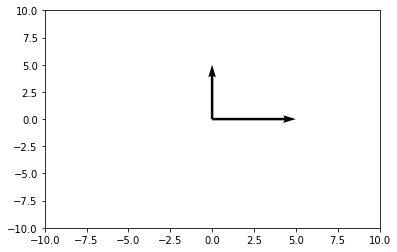

In [46]:
plt.quiver([0,0],[0,0],A[0],A[1],angles = 'xy', scale_units='xy', scale = 1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

This is getting out of hand. Let's just explore with the setosa link given above.

In [47]:
A = np.array([[2,0],[0,2]])

In [48]:
values, vectors = np.linalg.eig(A)

In [49]:
values

array([2., 2.])

In [50]:
vectors

array([[1., 0.],
       [0., 1.]])

Woah, nice. Now that's starting to make sense. So, the values are what you would use to ideally scale your identity matrix. But, what if the vector isnt the identity matrix?

In [59]:
A = np.array([[2.75,0],[0,2.5]])
np.linalg.det(A)

6.875

In [60]:
values, vectors = np.linalg.eig(A)

In [61]:
values

array([2.75, 2.5 ])

In [62]:
vectors

array([[1., 0.],
       [0., 1.]])

Can we say that the eigenvalues are the magnitude of the projections of the original vectors along the primary axes?

Aha, I think  I figured it out, so the A . v multiplication on the LHS, it rotates the vectors.<br>
On the rhs, we the projections along the v vectors scaled by certain amounts to get the same thing.

So, lets say we have two vectors and we multiply them.<hr>
The product is a scalar. It's the projection on A onto v and v onto A. (dot product)<hr>
Consider the vector v and the result np.dot(A,v), we can interpret this as a scaled version of v along the same direction of v (assuming the direction of course, since dot product gives a scalar result)<hr>
Instead of all this jazz, we could simply have scaled v by some factor, this factor being &lambda; <hr>

So, in a way it's about trying to find a vector (v) that is similar to another.(A)<br>Seems like it might be easier to deal with v than it is to deal with A.<br>Will v have lesser dimensions or something? Absolutely not. For all the matrices that we have seen till now, v has the same dimensions as A.<br>Ah wait, the final form was -<br>
A = V . diag(&lambda;) . V<sup>-1</sup>; so &lambda; (eigenvalue) IS easier to deal with since it is a diagonal vector.

## SVD:

A = U . D . V<sup>T</sup>; where U and V are orthogonal, i.e their inverse is their transpose. D is a diagonal matrix.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html

In [67]:
A = np.random.random([4,4])*10

In [68]:
A

array([[3.37688405, 0.81912202, 2.59954613, 0.53429634],
       [1.27958808, 9.80734046, 7.52157338, 8.50465961],
       [2.49378264, 7.07544599, 6.24251801, 9.45278165],
       [4.02867635, 1.61368105, 3.45767497, 2.88372876]])

In [69]:
u, s, vh = np.linalg.svd(A)

In [70]:
u

array([[-0.13109882,  0.65039441,  0.40758922, -0.62743226],
       [-0.71119983, -0.33467005,  0.58991685,  0.18490231],
       [-0.64441634, -0.02569249, -0.68571474, -0.33743558],
       [-0.24846625,  0.68141248, -0.12515762,  0.67696168]])

In [71]:
s

array([2.09662243e+01, 5.06242202e+00, 2.08371132e+00, 8.25505887e-03])

In [72]:
vh

array([[-0.18891207, -0.57439255, -0.50424126, -0.61654374],
       [ 0.878865  , -0.36181775,  0.27046381, -0.15340646],
       [-0.03983804,  0.51143295,  0.37592006, -0.77170809],
       [ 0.43625849,  0.52687517, -0.72888558, -0.02840591]])

In [74]:
result = np.dot(u*s,vh)

In [75]:
result

array([[3.37688405, 0.81912202, 2.59954613, 0.53429634],
       [1.27958808, 9.80734046, 7.52157338, 8.50465961],
       [2.49378264, 7.07544599, 6.24251801, 9.45278165],
       [4.02867635, 1.61368105, 3.45767497, 2.88372876]])

In [76]:
np.allclose(result,A)

True

U and S are Hadamard products (broadcasted) and we then take a dot product with the inverse of v.

I dont feel like going into the physical significance of SVD myself right now.....<br>https://medium.com/data-science-group-iitr/singular-value-decomposition-elucidated-e97005fb82fa - is pretty good.

# Moore Penrose PseudoInverse:

Used to find the "pseudoinverse" of matrices using SVD where there might not be a real inverse.

A - matrix<br>
Ax = y might not have a solution of the form x = By, since B may not exist esp for non-square matrices.<br>
So, we calculate the pseudoinverse:
A<sup>+</sup> = V . D<sup>+</sup> . U<sup>T</sup>

U,D,V - SVD of a A.
D<sup>+</sup> = pseudoinverse of D - take reciprocal of the non-zero elements then take the transpose of the matrix.

Two cases:<br>
1. If A has more columns than rows:<br>
MPP provides one of many possible solutions<br>
x = A<sup>+</sup>y  where x has the least L2 norm possible.
2. If A has more rows than columns:
Possible that there is no solution.
Gives closest solution such that the L2 norm of (Ax-y) is as close to zero as possible.

# Trace:

Sum of all diagonal entries of a matrix.<br>
Read the book for this part.

# Determinant:

Usual determinant solution of a square matrix.<br>
Also the product of all eigenvalues<br>
Measure of contraction.

# PCA: Principal Component Analysis:

* We want to apply lossy compression - i.e say project these points like a projection of a 3D vector on a 2D surafe.<br>
* PCA is used for visualizing the data and transformations in a human interpretable format, project from N dimendions to 2 or 3 dimensions.<br>
* We lose some information in the course of this projection, trying to keep this loss to a minimum.<br>
Say we have m points:<br>
{x<sup>1</sup>, x<sup>2</sup>,......, x<sup>m</sup>}


For all points:<br> 
x<sup>(i)</sup> $\subset \mathbb{R}$<sup>n</sup>,<br>
Find a corresponding point <br>
c<sup>(i)</sup> $\subset \mathbb{R}$<sup>l</sup>,<br>

For l < n, we can store a representation of points in a lower dimensional space. (less data, simpler math)

We want to find a function and its inverse such that:<br>
$f(x) = c$, c is a l-dimensional point<br>
$x \approx g(f(c))$, x is a n-dimensional point

Let: $g(c) = Dc$, where $D \subset \mathbb{R}$<sup>n $\times$ l</sup>

PCA is defined by our choice of the function $g$.<br>
For simplicity, the columns of $D$ are orthogonal to each other. (Inverse of Matrix = Transpose of Matrix, only square matrices can be orthogonal, so this is an approximation)<br>


To get a unique solution, we constrain all columns of $D$ to have a unit norm.

Source (math jax exponentiation): https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference<br>
argmin: https://stackoverflow.com/questions/36174987/how-to-typeset-argmin-and-argmax-in-markdown

To get the optimal code point $c^*$ for input $x$,<br>
minimize the distance between the input $x$ and what the decoder predicts $x$ to be, i.e $g(c^*)$<br>
We can define the distance using L2 norm, so:<br>

$c^* = \underset{c}{\operatorname{arg min}} \Vert x - g(c)\Vert_2$   

Think of it like $x- g(c)$ being the distance function between the input and its projection.<br> We take the argmin just for the special case where we want to minimize the distance between them.<br> We want the argument - the the input to the function - $c^*$ when the value of the distance function is the least.<br>
Squaring the L2 norm because that won't change the arg min.

$c^* = \underset{c}{\operatorname{arg min}} \Vert x - g(c)\Vert_2^2$   

The squared L2 norm of a vector $x$ is also given by $x^Tx$

so, the rhs without the argmin is:<br>
$(x - g(c))^T(x- g(c))$<br><br>
$= x^Tx - x^Tg(c) - g(c)^Tx + g(c)^Tg(c)$<br><br>
$= x^Tx - 2x^Tg(c) + g(c)^Tg(c)$<br><br>

The book says, the scalar $g(c)^Tx$ is equal to its own transpose. Let's work it out:<br>
$g(c)$ - Inverse function, gives a point $y$ in N-D space
$x$ - is a point in N-D space <br>
$y$ is Nx1
$y^T$ is 1xN
$x$ is Nx1<br>
$y^Tx$ is a 1xN $\times$ Nx1 vector<br>
Which is a scalar, and a scalar is its own transpose.<br>
Bringing back the arg min:<br>

$c^* = \underset{c}{\operatorname{arg min}} - 2x^Tg(c) + g(c)^Tg(c)$ 

Since, $= x^Tx$ does not vary with $c$

Substitute, $g(c) = Dc$:

$c^* = \underset{c}{\operatorname{arg min}} - 2x^TDc + c^TD^TDc$ 

$D^TD = I_l$, since it is roughly orthogonal, tranpose being inverse.

$c^* = \underset{c}{\operatorname{arg min}} - 2x^TDc + c^TI_lc$ <br>
$c^* = \underset{c}{\operatorname{arg min}} - 2x^TDc + c^Tc$ 

In normal calculus, wherever the derivative is 0. You either get a minima or a maxima of a function. We can key in the obtained value in the function to check the point obtained is a minima or a maxima.

For vector calculus, we use gradients for this purpose:<br>
Source: https://arxiv.org/pdf/1802.01528.pdf

The gradient is just a collection of partial derivatives. For the gradient with respect to c for our purpose here, we just need to take the partial derivative of the function with respect to c.

A small demonstration:

In [45]:
a = np.array([[1,4,5],[5,6,7],[6,7,8]])

In [46]:
a

array([[1, 4, 5],
       [5, 6, 7],
       [6, 7, 8]])

In [47]:
np.linalg.det(a)

1.9999999999999984

In [48]:
np.dot(a,a)

array([[ 51,  63,  73],
       [ 77, 105, 123],
       [ 89, 122, 143]])

In [49]:
a*a

array([[ 1, 16, 25],
       [25, 36, 49],
       [36, 49, 64]])

In [50]:
a.transpose()*a

array([[ 1, 20, 30],
       [20, 36, 49],
       [30, 49, 64]])

In [51]:
np.dot(a.transpose(),a)

array([[ 62,  76,  88],
       [ 76, 101, 118],
       [ 88, 118, 138]])

So, for non orthogonal matrices, the multiplication works out like shown in the 4 cells above.<br>
Also, note that for non orthogonal matrices there is NOTHIGN SPECIAL about $a^Ta$. It's the normal row,col song product. I was mis-led by the gradient of $c^Tc$ wrt c being $2c$. Was expecting a sqaure somewhere.<br>

For orthogonal matrices:<br>
Source: https://en.wikipedia.org/wiki/Orthogonal_matrix

In [66]:
a = np.array([[0,-0.80,-0.60],[0.80,-0.36,0.48],[0.60,0.48,-0.64]])

In [67]:
a

array([[ 0.  , -0.8 , -0.6 ],
       [ 0.8 , -0.36,  0.48],
       [ 0.6 ,  0.48, -0.64]])

In [68]:
np.linalg.det(a)

-1.0

In [69]:
np.dot(a,a)

array([[-1.00000000e+00, -4.44089210e-19, -1.42108547e-17],
       [ 4.44089210e-19, -2.80000000e-01, -9.60000000e-01],
       [ 1.42108547e-17, -9.60000000e-01,  2.80000000e-01]])

In [70]:
a*a

array([[0.    , 0.64  , 0.36  ],
       [0.64  , 0.1296, 0.2304],
       [0.36  , 0.2304, 0.4096]])

In [71]:
a.transpose()*a

array([[ 0.    , -0.64  , -0.36  ],
       [-0.64  ,  0.1296,  0.2304],
       [-0.36  ,  0.2304,  0.4096]])

In [72]:
np.dot(a.transpose(),a)

array([[ 1.00000000e+00,  4.44089210e-19,  1.42108547e-17],
       [ 4.44089210e-19,  1.00000000e+00, -2.19380070e-17],
       [ 1.42108547e-17, -2.19380070e-17,  1.00000000e+00]])

The above cell shows that all products in our equation are dot products. I forgot and wanted to confirm.

Back to PCA, consider onlt he RHS,<br>
$\nabla_c(\underset{c}{\operatorname{arg min}} - 2x^TDc + c^Tc) = \nabla_c(- 2x^TDc + c^Tc)  $ , for the case where we find minima, the first term is already the expression for minima

Set to 0. to find minima.

$\nabla_c(- 2x^TDc + c^Tc) = 0 $ 

$(- 2D^Tx + 2c) = 0 $ 

The first lhs term - see below.<br>
The second one is a bit of a challenge, how does the derivative/gradient come to 2c?<br>Per normal calculus, it makes sense that something like c square when differentiated gives 2c. But how does it actually work with vector calculus?

In [3]:
a = np.array([[1,2,3,4,5]])

In [4]:
a

array([[1, 2, 3, 4, 5]])

In [5]:
a.transpose()

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [6]:
np.dot(a,a.transpose())

array([[55]])

In [7]:
np.dot(a.transpose(),a)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

In [8]:
a = np.array([[1,2,3,4,5]])
a = a.transpose()

In [9]:
a

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [10]:
a.transpose()

array([[1, 2, 3, 4, 5]])

In [11]:
np.dot(a,a.transpose())

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

In [12]:
np.dot(a.transpose(),a)

array([[55]])

Just to shoo away some god-awful doubts, I've added the above lines of code.

Check this out:<br>
https://atmos.washington.edu/~dennis/MatrixCalculus.pdf<br>
According to Proposition 11 in above, shouldn't the gradient be twice of c tranposed? Or is that the difference due to the between derivatives and gradients?


http://www.matrixcalculus.org/<br>
Says derivative of transpose of x into x is twice of x.

These helped:<br>
https://math.stackexchange.com/questions/1377764/derivative-of-vector-and-vector-transpose-product<br>
https://eli.thegreenplace.net/2015/the-normal-equation-and-matrix-calculus/

Say c = [c1, c2 ...., cn] - is a column vector<br>
Then, $c^Tc $ = [c1, c2 ...., cn]<sup>T</sup>[c1, c2 ...., cn]


Which is,<br>
c1c1 + c2c2 + .... + cncn --->Say this is z.

$\nabla_c(f)$ =<br>
[<br>
partial derivative wrt c1<br>
partial derivative wrt c2<br>
.<br>
.<br>
.<br>
partial derivative wrt cn<br>
]<br>

Using the above, we get $\nabla_c(c^Tc) = $ <br>
[<br>
partial derivative of z wrt c1 ---> 2c1<br>
partial derivative of z wrt c2 ---> 2c2<br>
.<br>
.<br>
partial derivative of z wrt cn ---> 2cn<br>
]<br>
$\nabla_c(c^Tc) = 2c.$ Finally!

Equation :$\nabla_c(- 2x^TDc + c^Tc) = 0 $

So, for the first term:<br>
$\nabla_c(x^TDc) $  <br>
http://www.matrixcalculus.org/ says it is transpose of D multiplied by X.<br>

x - nx1 dimensional - col vector<br>
D - nxl dimensions <br>
c - lx1 dimensions - col vector <br>
<hr>
x<sup>T</sup> - [x1 x2 ..xn]<br><br>
d - <br>
[<br>
d11 d12 ... d1l<br>
d21 d22 ... d2l<br>
.<br>
.<br>
dn1 dn2 ... dnl<br>
]<br>
<hr>
x<sup>T</sup>D-<br>
output: (1xn).(nxl) = (1xl) matrix<br>
This is a row matrix, im differentiating between elements using commas.<br>
[
d11x1 + d21x2 + ... + dn1xn,
d12x1 + d22x2 + ... + dn2xn,
...........,
d1lx1 + d2lx2 + ... + dnlxn
]<br>
<hr>
c - [<br>
c1<br>
c2<br>
.<br>
.<br>
cl<br>
]
<hr>
x<sup>T</sup>Dc- (Let this be function k)<br>
output: (1xl).(lxl) = (1x1) matrix - Scalar<br>
Output is a scalar - <br>
(d11x1 + d21x2 + ... + dn1xn)c1+<br>
(d12x1 + d22x2 + ... + dn2xn)c2+<br>
.........+<br>
(d1lx1 + d2lx2 + ... + dnlxn)cl<br>
<hr>
Gradient of k with rrespect to c -<br>
[<br>
partial derivative of k wrt c1<br>
partial derivative of k wrt c2<br>
.<br>
.<br>
partial derivative of k wrt cl<br>
]<br><br>
Which is the following (lx1) vector- <br>
[<br>
(d11x1 + d21x2 + ... + dn1xn)<br>
(d12x1 + d22x2 + ... + dn2xn)<br>
.<br>
.<br>
(d1lx1 + d2lx2 + ... + dnlxn)<br>
]<br>
This is the transpose of x<sup>T</sup>D --> D<sup>T</sup>x<br>


### It takes rather long to open up every matrix and do the above, I'll consider sticking to the formulas. Maybe. But I also feel very convinced by this result now.

So, coming back to the original equation, we have<br>
$(- 2D^Tx + 2c) = 0 $ <br>
$c = D^Tx $ 

$f(x) = c$<br>
$f(x) = D^Tx$<br>
So the inverse of $f(x)$ is then simply multiplying D to get back x:
$g(f(x)) = DD^Tx$<br>

So far so good. Now we need to choose D, since we have been hand wavy about it.

Actually, this is pretty clear in the book itself. Read the last 3 pages of the chapter.  

## TO DO:
- [ ] Derive the proof mentioned on Page 50.